In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

Reading the files

In [2]:
customer_visits = pd.read_csv(r"D:\Project2DO4_CV\dataset\Marketing ROI Analysis\archive\visits_log_us.csv")
customer_orders = pd.read_csv(r"D:\Project2DO4_CV\dataset\Marketing ROI Analysis\archive\orders_log_us.csv")

costs = pd.read_csv(r"D:\Project2DO4_CV\dataset\Marketing ROI Analysis\archive\costs_us.csv")



In [3]:
customer_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
customer_visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
customer_orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [6]:
customer_orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [7]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [18]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Processing the data

In [8]:
customer_visits.isnull().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [9]:
customer_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [10]:
customer_visits.head(2)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740


In [11]:
customer_visits.rename(columns={'Device':'device', 'End Ts':'end_ts', 'Source Id':'source_id', 'Start Ts':'start_ts', 'Uid':'uid'}, inplace=True)
customer_visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

In [12]:
customer_visits.head(2)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740


In [13]:
print(customer_visits['device'].unique())
customer_visits['source_id'].unique()

['touch' 'desktop']


array([ 4,  2,  5,  9,  3,  1, 10,  7,  6], dtype=int64)

In [14]:
customer_visits['device'] = customer_visits['device'].astype('category')
customer_visits['source_id'] = customer_visits['source_id'].astype('int8')

customer_visits['end_ts'] = pd.to_datetime(customer_visits['end_ts'], format='%Y-%m-%d %H:%M:%S')
customer_visits['start_ts'] = pd.to_datetime(customer_visits['start_ts'], format='%Y-%m-%d %H:%M:%S')

customer_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int8          
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int8(1), uint64(1)
memory usage: 8.9 MB


In [15]:
customer_orders.isnull().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [16]:
customer_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [17]:
customer_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [18]:
customer_orders.rename(columns={'Buy Ts':'buy_ts', 'Revenue':'revenue', 'Uid':'uid'}, inplace=True)
customer_orders.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

In [19]:
customer_orders['revenue'] = customer_orders['revenue'].astype('float16')

customer_orders['buy_ts'] = pd.to_datetime(customer_orders['buy_ts'], format='%Y-%m-%d %H:%M:%S')
customer_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float16       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float16(1), uint64(1)
memory usage: 886.3 KB


Costs


In [20]:
costs.isnull().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [21]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [22]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [23]:
costs['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10], dtype=int64)

In [24]:
costs['costs'].describe()

count    2542.000000
mean      129.477427
std       156.296628
min         0.540000
25%        21.945000
50%        77.295000
75%       170.065000
max      1788.280000
Name: costs, dtype: float64

In [25]:
costs['source_id'] = costs['source_id'].astype('int8')
costs['costs'] = costs['costs'].astype('float16')

costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int8          
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float16       
dtypes: datetime64[ns](1), float16(1), int8(1)
memory usage: 27.4 KB


So far the missing values from each dataframes were dropped. The strings-->datatime/category; large int/float--> smaller int/float;
were converted. This drastically dropped the size of the dataframe.
For programming ease and simplicity, the names of the columns were converted into lowercase and spaces were converted to underscores.


Exploratory Data Analysis (EDA) - Product

In [26]:
customer_visits.head(3)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527


In [27]:
customer_visits['date'] = pd.DatetimeIndex(customer_visits['start_ts']).date
customer_visits['week'] = pd.to_datetime(customer_visits['start_ts']).dt.to_period('W')
customer_visits['month_year'] = pd.to_datetime(customer_visits['start_ts']).dt.to_period('M')
customer_visits['year'] = pd.DatetimeIndex(customer_visits['start_ts']).year

customer_visits.head(3)

,device,end_ts,source_id,start_ts,uid,date,week,month_year,year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18/2017-12-24,2017-12,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19/2018-02-25,2018-02,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26/2017-07-02,2017-07,2017


In [28]:
customer_date_visits_unique = customer_visits.pivot_table(values='uid', index=['date'], aggfunc=lambda x: len(x.unique()))
customer_date_visits_unique.head(5)



,uid
date,
2017-06-01,605
2017-06-02,608
2017-06-03,445
2017-06-04,476
2017-06-05,820


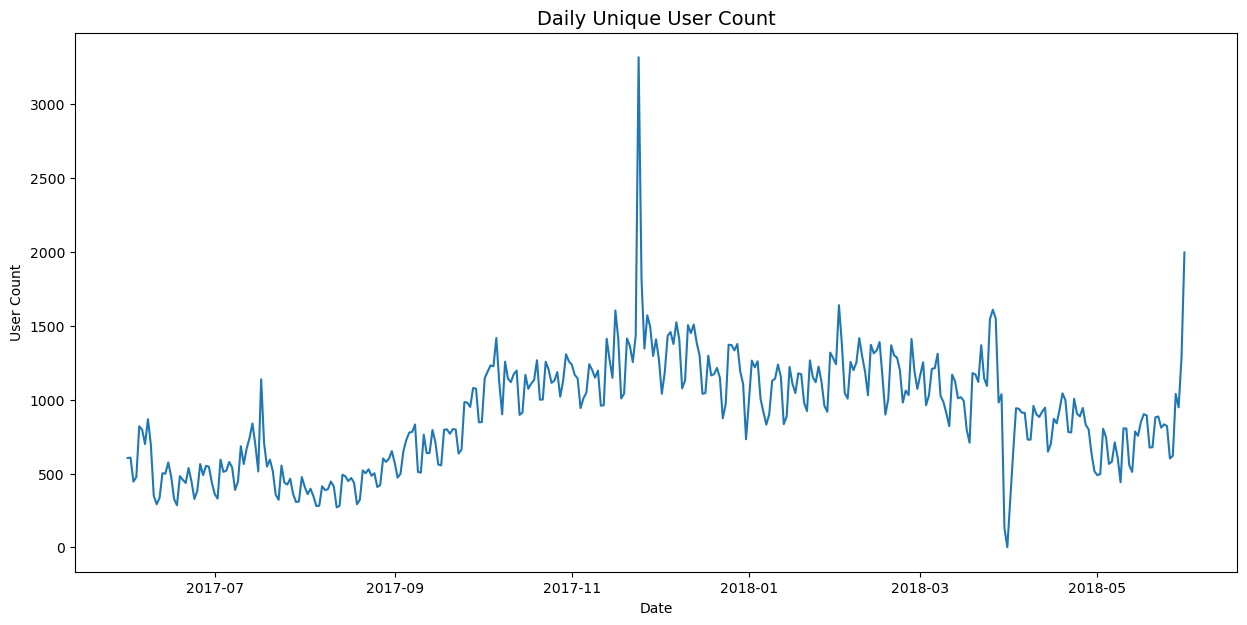

In [29]:
customer_date_visits_unique.plot.line(figsize=(15,7), legend=False)

plt.title('Daily Unique User Count', fontsize=14)
plt.xlabel('Date')
plt.ylabel('User Count')
plt.show()
plt.show()

Daily minimum: 1
Daily max: 3319
Daily mean: 908.0
Daily median: 921.0
Daily standard deviation: 370.5


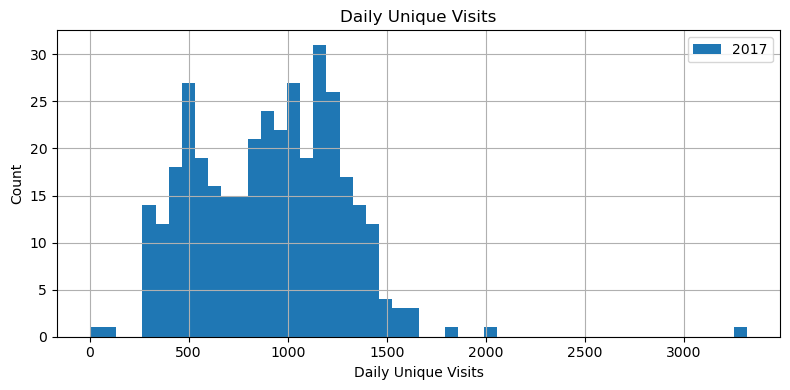

In [58]:
customer_date_visits_unique.reset_index(drop=True, inplace=True)

# Summary statistics
print('Daily minimum:', customer_date_visits_unique['uid'].min())
print('Daily max:', customer_date_visits_unique['uid'].max())
print('Daily mean: {:.1f}'.format(customer_date_visits_unique['uid'].mean()))
print('Daily median: {:.1f}'.format(customer_date_visits_unique['uid'].median()))
print('Daily standard deviation: {:.1f}'.format(customer_date_visits_unique['uid'].std()))

# Plot histogram
customer_date_visits_unique['uid'].hist(bins=50, label='2017', figsize=[8, 4])

# Chart labels
plt.title('Daily Unique Visits')
plt.xlabel('Daily Unique Visits')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()


In [30]:
customer_date_visits_unique[customer_date_visits_unique['uid'] > 3000]

,uid
date,
2017-11-24,3319


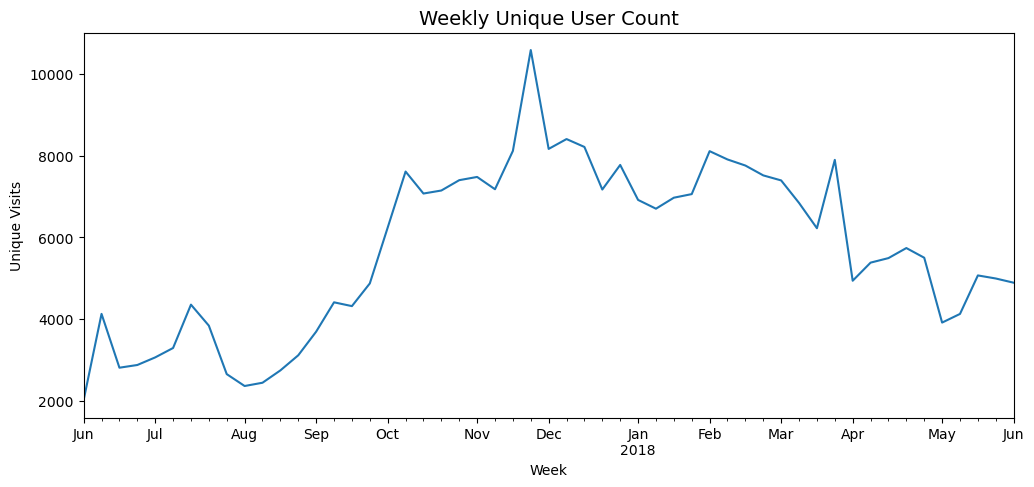

In [31]:
week_visits_unique = customer_visits.pivot_table(values='uid', index=['week'], aggfunc=lambda x: len(x.unique()))
week_visits_unique.plot.line(figsize=(12,5), legend=False)

plt.title('Weekly Unique User Count', fontsize=14)
plt.xlabel('Week')
plt.ylabel('Unique Visits')
plt.show()

In [32]:
print('Weekly minimum:', week_visits_unique['uid'].min())
print('Weekly max:', week_visits_unique['uid'].max())
print('Weekly mean: {:.1f}'.format(week_visits_unique['uid'].mean()))
print('Weekly median: {:.1f}'.format(week_visits_unique['uid'].median()))
print('Weekly standard deviation: {:.1f}'.format(week_visits_unique['uid'].std()))

Weekly minimum: 2021
Weekly max: 10586
Weekly mean: 5716.2
Weekly median: 5740.0
Weekly standard deviation: 2049.9


Month

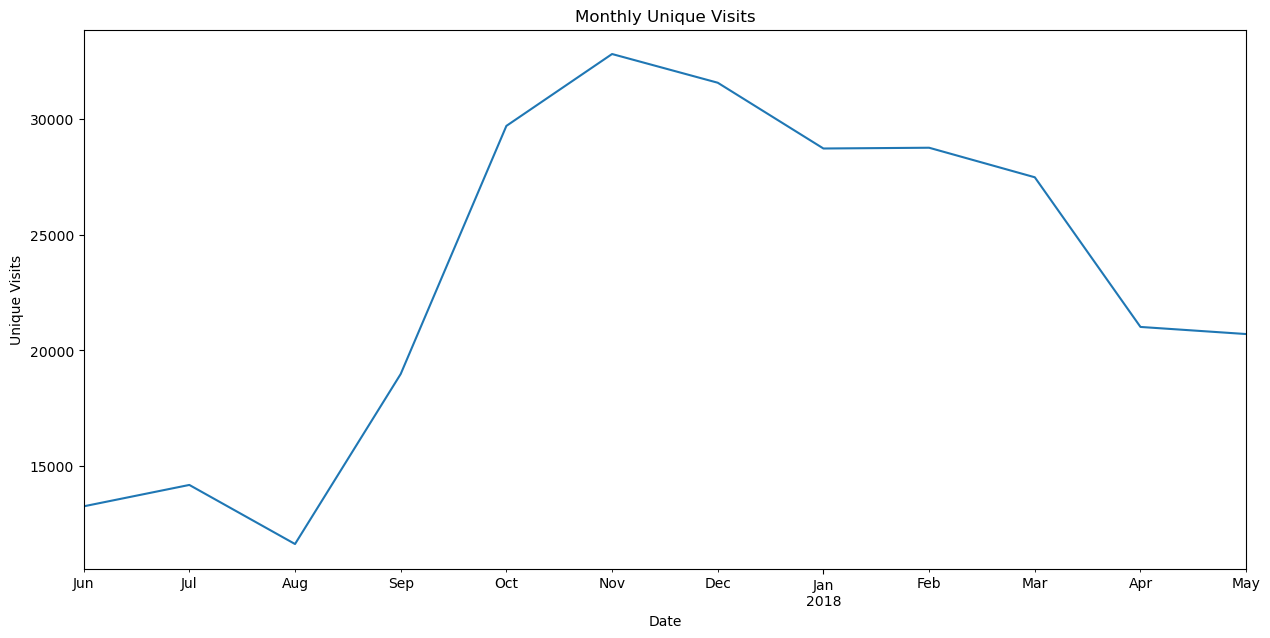

Monthly minimum: 11631
Monthly max: 32797
Monthly mean: 23228.4
Monthly median: 24240.5
Monthly standard deviation: 7546.4


In [33]:
# Create a pivot table: unique 'uid' per 'month_year'
month_visits_unique = customer_visits.pivot_table(
    values='uid',
    index='month_year',
    aggfunc=lambda x: x.nunique()
)

# Plot the data
month_visits_unique.plot.line(figsize=(15, 7), legend=False)
plt.title('Monthly Unique Visits')
plt.xlabel('Date')
plt.ylabel('Unique Visits')
plt.show()

# Reset index to access 'month_year' as a column
month_visits_unique.reset_index(inplace=True)

# Summary statistics
print('Monthly minimum:', month_visits_unique['uid'].min())
print('Monthly max:', month_visits_unique['uid'].max())
print('Monthly mean: {:.1f}'.format(month_visits_unique['uid'].mean()))
print('Monthly median: {:.1f}'.format(month_visits_unique['uid'].median()))
print('Monthly standard deviation: {:.1f}'.format(month_visits_unique['uid'].std()))




In [ ]:
Aggregated User matrics

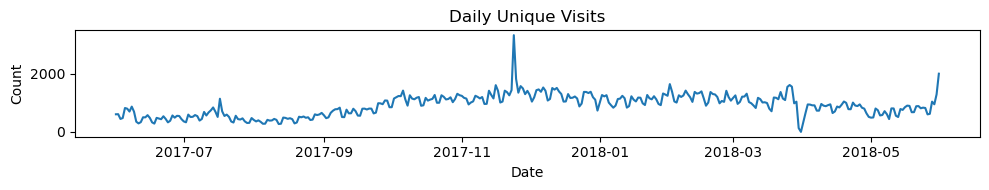

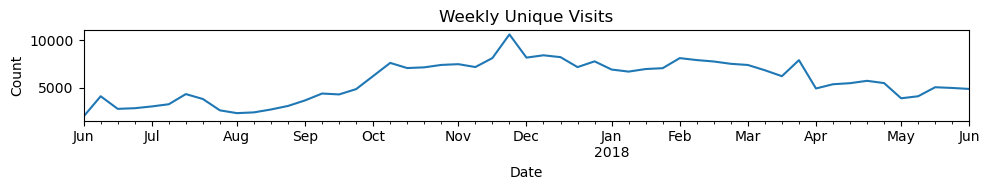

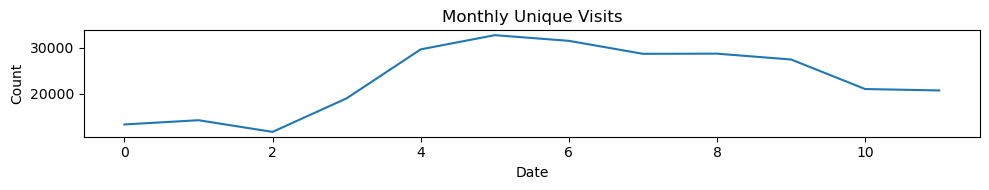

In [34]:
# Plot daily unique visits
customer_date_visits_unique.plot.line(figsize=(10, 2), legend=False)
plt.title('Daily Unique Visits')
plt.xlabel('Date')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Plot weekly unique visits
week_visits_unique.plot.line(figsize=(10, 2), legend=False)
plt.title('Weekly Unique Visits')
plt.xlabel('Date')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Plot monthly unique visits
month_visits_unique.plot.line(figsize=(10, 2), legend=False)
plt.title('Monthly Unique Visits')
plt.xlabel('Date')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [35]:
sessions_per_user = customer_visits.groupby(['date']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
sessions_per_user.head()

,n_sessions,n_users,sessions_per_user
date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024


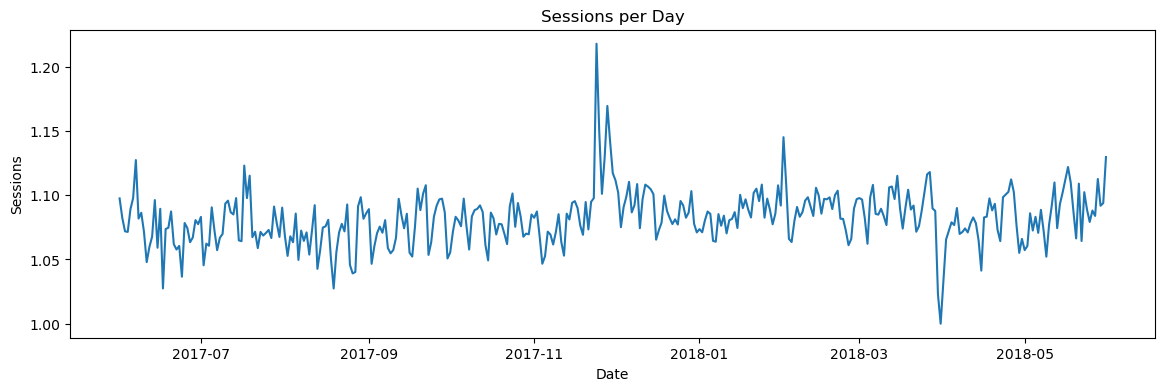

Average sessions per day: 1.082169644003972
Median sessions per day: 1.0824875552419868


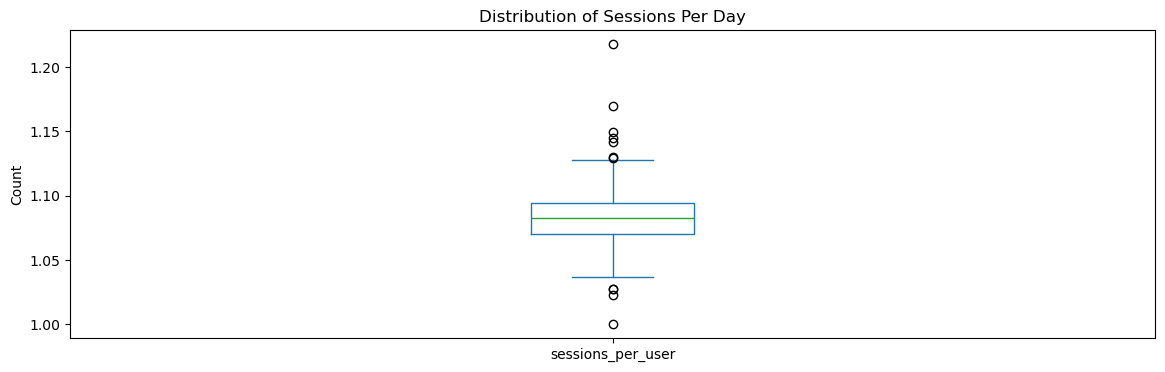

In [36]:
sessions_per_user['sessions_per_user'].plot.line(figsize=(14,4), legend=False)
plt.title('Sessions per Day')
plt.xlabel('Date')
plt.ylabel('Sessions')
plt.show()

print('Average sessions per day:', sessions_per_user['sessions_per_user'].mean())
print('Median sessions per day:',sessions_per_user['sessions_per_user'].median())

sessions_per_user['sessions_per_user'].plot.box(figsize=(14,4), legend=False)
plt.title('Distribution of Sessions Per Day')
plt.ylabel('Count')
plt.show()

In [38]:
customer_visits['session_duration_sec'] = (customer_visits['end_ts'] - customer_visits['start_ts']).dt.seconds

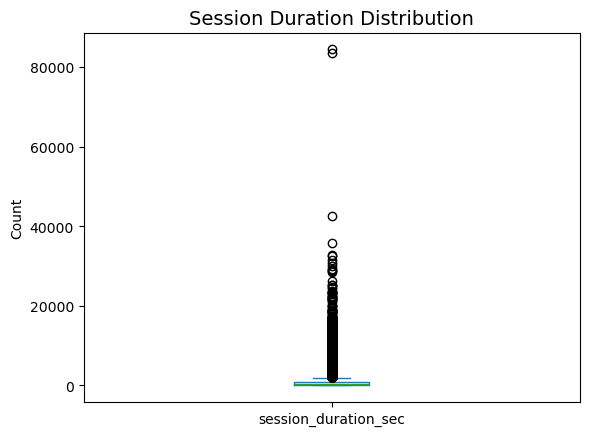

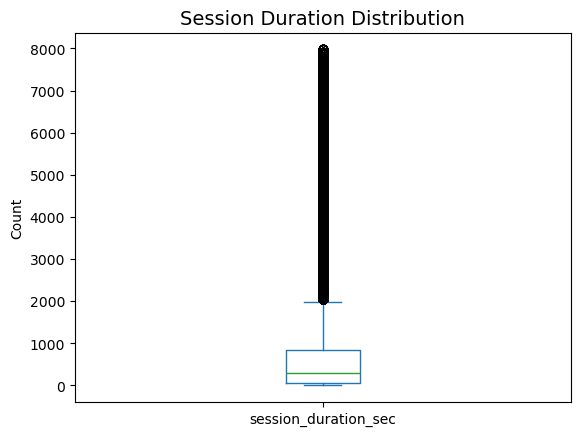

Median session duration in seconds: 300.0
Average session duration in seconds: 643.506488592098
Mode of session duration in seconds:


0    60
Name: session_duration_sec, dtype: int32

In [39]:
customer_visits['session_duration_sec'].plot.box() 
plt.title('Session Duration Distribution', fontsize=14)
plt.ylabel('Count')
plt.show()

customer_visits.query('session_duration_sec < 8000')['session_duration_sec'].plot.box() 
plt.title('Session Duration Distribution', fontsize=14)
plt.ylabel('Count')
plt.show()

print('Median session duration in seconds:', customer_visits['session_duration_sec'].median())
print('Average session duration in seconds:', customer_visits['session_duration_sec'].mean())
print('Mode of session duration in seconds:')
customer_visits['session_duration_sec'].mode()

How often one comes back?

In [40]:
min_visit = customer_visits.groupby(['uid'])['start_ts'].min().reset_index()
min_visit.columns = ['uid', 'first_visit']

retention_data = customer_visits.merge(min_visit[['uid', 'first_visit']], 
                              on=['uid'], 
                              how='left')
retention_data.head()

,device,end_ts,source_id,start_ts,uid,date,week,month_year,year,session_duration_sec,first_visit
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18/2017-12-24,2017-12,2017,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19/2018-02-25,2018-02,2018,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26/2017-07-02,2017-07,2017,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-14/2018-05-20,2018-05,2018,1440,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-25/2017-12-31,2017-12,2017,0,2017-12-27 14:06:00


In [41]:
#adding cohorts
retention_data['cohort'] = retention_data['first_visit'].apply(lambda x: x.strftime('%Y-%m'))

#adding each row's user's retention
retention_data['retention_date'] = (
    (retention_data['start_ts'] - retention_data['first_visit']) / np.timedelta64(1, 'D')).astype(int)

#excluding visits that are the first visit, because then they are not an example of retention
retention_data_clean = retention_data[retention_data.start_ts != retention_data.first_visit]

retention_data_clean.head()

,device,end_ts,source_id,start_ts,uid,date,week,month_year,year,session_duration_sec,first_visit,cohort,retention_date
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-14/2018-05-20,2018-05,2018,1440,2018-03-09 20:05:00,2018-03,71
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-30,2018-01-29/2018-02-04,2018-01,2018,3360,2017-06-29 09:00:00,2017-06,215
11,desktop,2018-01-25 19:41:00,1,2018-01-25 19:37:00,7478054213403174082,2018-01-25,2018-01-22/2018-01-28,2018-01,2018,240,2018-01-25 14:16:00,2018-01,0
12,desktop,2018-02-06 15:50:00,4,2018-02-06 15:45:00,8056418121947262981,2018-02-06,2018-02-05/2018-02-11,2018-02,2018,300,2017-06-04 14:17:00,2017-06,247
14,touch,2018-04-23 18:01:00,9,2018-04-23 18:00:00,18026419100367255411,2018-04-23,2018-04-23/2018-04-29,2018-04,2018,60,2017-10-04 22:44:00,2017-10,200


In [42]:
retention_list = [0, 1, 2, 7, 14, 30]
def retention(retention_day, group_by):
    grouped = (retention_data_clean
               .query('retention_date==@retention_day')
               .groupby(group_by)['uid']
               .nunique()/retention_data_clean.groupby(group_by)['uid'].nunique())*100
    grouped = grouped.reset_index().rename(columns={'uid':'Retention_{}%'.format(retention_day)})
    return grouped

new_retention = []
for i in retention_list:
    new_retention.append(retention(i, 'cohort'))

new_retention = pd.concat(new_retention, axis=1)
new_retention = new_retention.loc[:, ~new_retention.columns.duplicated()]
new_retention.set_index('cohort', inplace=True)
new_retention

,Retention_0%,Retention_1%,Retention_2%,Retention_7%,Retention_14%,Retention_30%
cohort,,,,,,
2017-06,17.732620,5.026738,3.336898,2.331551,2.096257,1.069519
2017-07,18.929942,5.710173,3.718810,1.751440,1.319578,0.743762
2017-08,15.900704,3.790674,2.717209,1.912110,1.274740,0.872191
2017-09,19.627681,4.957507,3.561311,1.902064,2.063942,0.991501
2017-10,23.145275,6.318759,4.259520,2.369535,2.242595,1.198872
2017-11,26.998051,8.674464,5.569479,3.383459,2.520189,0.988583
2017-12,28.342342,7.729730,5.873874,2.882883,1.945946,1.171171
2018-01,28.154258,8.181008,4.904146,2.674989,1.917075,1.003121
2018-02,31.724663,8.585217,5.867412,3.429007,2.235204,1.219202


In [43]:
new_retention.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2017-06 to 2018-05
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Retention_0%   12 non-null     float64
 1   Retention_1%   12 non-null     float64
 2   Retention_2%   12 non-null     float64
 3   Retention_7%   12 non-null     float64
 4   Retention_14%  12 non-null     float64
 5   Retention_30%  12 non-null     float64
dtypes: float64(6)
memory usage: 672.0+ bytes


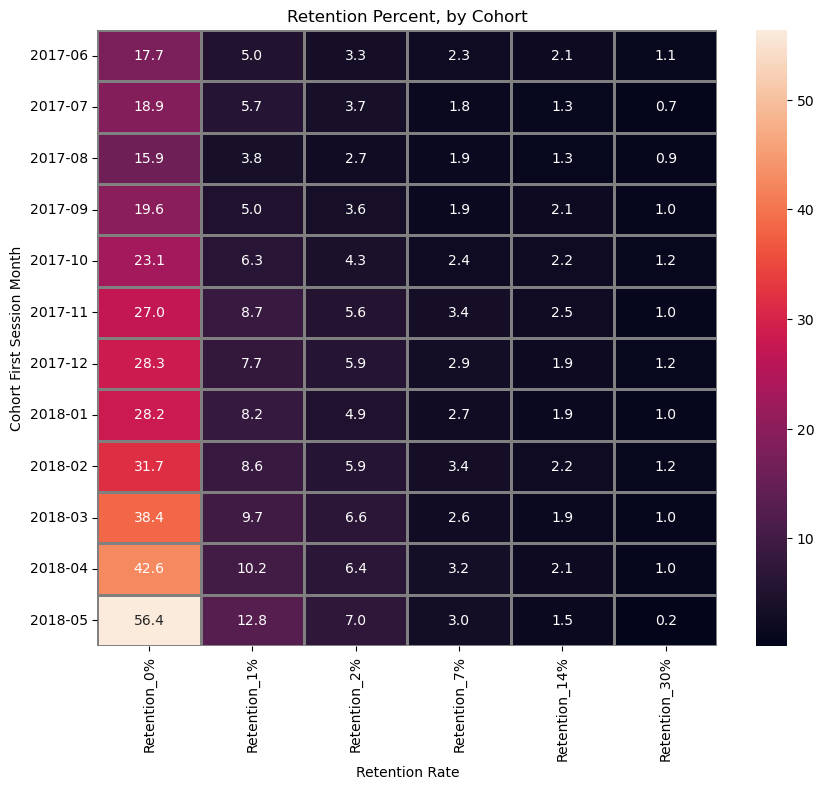

In [44]:
plt.figure(figsize=(10, 8))
plt.title('Retention Percent, by Cohort')
sns.heatmap(
    new_retention,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
) 
plt.xlabel('Retention Rate')
plt.ylabel('Cohort First Session Month')
plt.show()

EDA - Sales

In [46]:
customer_orders.head(3)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.000000,10329302124590727494
1,2017-06-01 00:25:00,0.549805,11627257723692907447
2,2017-06-01 00:27:00,0.370117,17903680561304213844


In [48]:
customer_visits.head(3)

,device,end_ts,source_id,start_ts,uid,date,week,month_year,year,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18/2017-12-24,2017-12,2017,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19/2018-02-25,2018-02,2018,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26/2017-07-02,2017-07,2017,0


In [49]:
first_session = customer_visits.groupby('uid')['date'].min()
first_session.name = 'first_session_date'
first_session.head()

uid
11863502262781     2018-03-01
49537067089222     2018-02-06
297729379853735    2017-06-07
313578113262317    2017-09-18
325320750514679    2017-09-30
Name: first_session_date, dtype: object

In [51]:
first_order = customer_orders.groupby('uid')['buy_ts'].min()
first_order.name = 'first_order_date'
first_order.head()

uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
Name: first_order_date, dtype: datetime64[ns]

In [71]:
orders = customer_orders.join(first_order,on='uid')
orders = customer_orders.join(first_session,on='uid')

customer_orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.000000,10329302124590727494
1,2017-06-01 00:25:00,0.549805,11627257723692907447
2,2017-06-01 00:27:00,0.370117,17903680561304213844
3,2017-06-01 00:29:00,0.549805,16109239769442553005
4,2017-06-01 07:58:00,0.370117,14200605875248379450


In [92]:
# Step 1: Prepare first_order and first_session as Series
first_order = customer_orders.groupby('uid')['buy_ts'].min()
first_order.name = 'first_order_date'

first_session = customer_visits.groupby('uid')['date'].min()
first_session.name = 'first_session_date'

# Step 2: Join both to customer_orders → into `orders`
orders = customer_orders.join(first_order, on='uid')
orders = orders.join(first_session, on='uid')  # ✅ Do NOT overwrite previous join

# Step 3: Convert to datetime
orders['first_order_date'] = pd.to_datetime(orders['first_order_date'])
orders['first_session_date'] = pd.to_datetime(orders['first_session_date'])

# Step 4: Calculate days to conversion
orders['days_to_conversion'] = (orders['first_order_date'] - orders['first_session_date']).dt.days

# Step 5: View the result
orders.head()


,buy_ts,revenue,uid,first_order_date,first_session_date,days_to_conversion
0,2017-06-01 00:10:00,17.000000,10329302124590727494,2017-06-01 00:10:00,2017-06-01,0
1,2017-06-01 00:25:00,0.549805,11627257723692907447,2017-06-01 00:25:00,2017-06-01,0
2,2017-06-01 00:27:00,0.370117,17903680561304213844,2017-06-01 00:27:00,2017-06-01,0
3,2017-06-01 00:29:00,0.549805,16109239769442553005,2017-06-01 00:29:00,2017-06-01,0
4,2017-06-01 07:58:00,0.370117,14200605875248379450,2017-06-01 07:58:00,2017-06-01,0


In [95]:
orders['days_to_conversion'] = pd.to_numeric(orders['days_to_conversion'], downcast='integer')
orders.head(3)


,buy_ts,revenue,uid,first_order_date,first_session_date,days_to_conversion
0,2017-06-01 00:10:00,17.000000,10329302124590727494,2017-06-01 00:10:00,2017-06-01,0
1,2017-06-01 00:25:00,0.549805,11627257723692907447,2017-06-01 00:25:00,2017-06-01,0
2,2017-06-01 00:27:00,0.370117,17903680561304213844,2017-06-01 00:27:00,2017-06-01,0


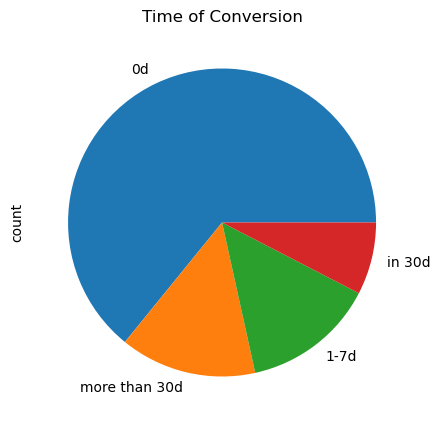

In [96]:
def conversion_cohort(days):
    if days == 0:
        return '0d'
    if days >= 1 and days < 8:
        return '1-7d'
    if days > 7 and days < 31:
        return 'in 30d'
    if days > 30:
        return 'more than 30d'
    else:
        return 'error'

orders['conversion_bracket'] = orders['days_to_conversion'].apply(conversion_cohort)



orders['conversion_bracket'].value_counts().plot.pie(figsize=(5,5))
plt.title('Time of Conversion')
plt.show()

In [97]:
orders['first_session_month'] = pd.to_datetime(orders['first_session_date']).dt.to_period('M')

cohort_conversion = orders.pivot_table(index='first_session_month', values='uid', columns='conversion_bracket', aggfunc='nunique')
cohort_conversion

conversion_bracket,0d,1-7d,in 30d,more than 30d
first_session_month,,,,
2017-06,1716.0,262.0,149.0,796.0
2017-07,1465.0,232.0,108.0,653.0
2017-08,1059.0,129.0,99.0,434.0
2017-09,1879.0,341.0,226.0,612.0
2017-10,3140.0,520.0,305.0,713.0
2017-11,2706.0,566.0,357.0,633.0
2017-12,2831.0,533.0,248.0,462.0
2018-01,2187.0,412.0,221.0,299.0
2018-02,2360.0,430.0,209.0,187.0


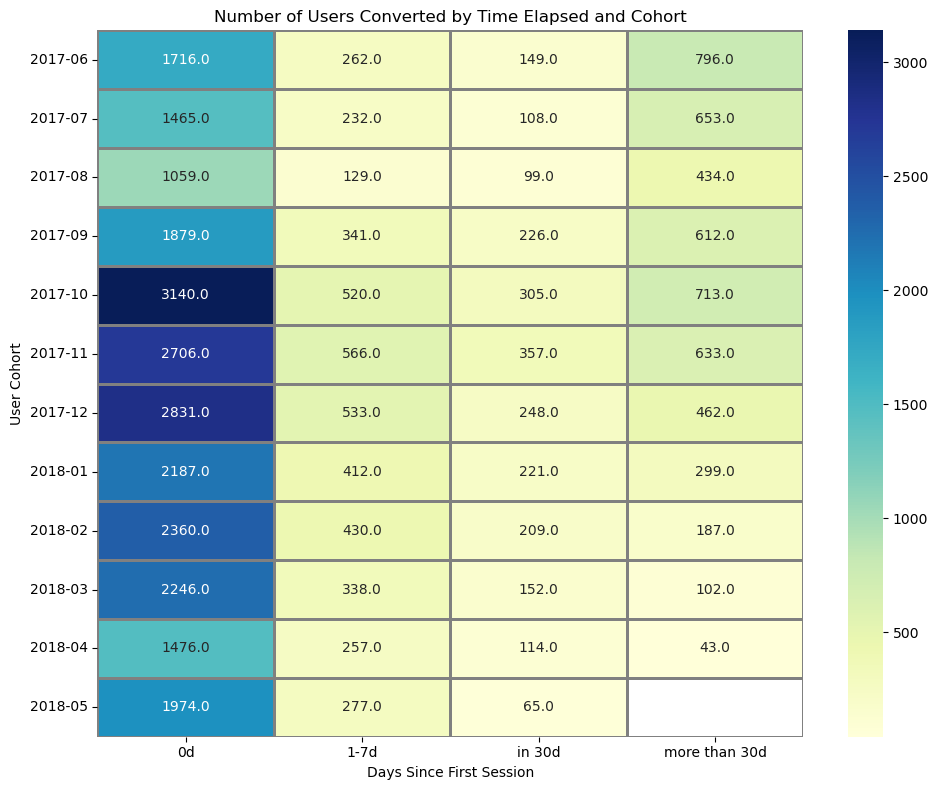

In [98]:
plt.figure(figsize=(10, 8))
plt.title('Number of Users Converted by Time Elapsed and Cohort')
sns.heatmap(
    cohort_conversion,
    annot=True,         # show the numbers
    fmt='.1f',          # format the float numbers to 1 decimal
    linewidths=1,       # grid lines between cells
    linecolor='gray',   # grid line color
    cmap='YlGnBu'       # optional: color palette
)
plt.xlabel('Days Since First Session')  # optional label
plt.ylabel('User Cohort')              # optional label
plt.tight_layout()
plt.show()


In [74]:
orders['buy_ts_month'] = pd.to_datetime(orders['buy_ts']).dt.to_period('M')
orders.head()

,buy_ts,revenue,uid,first_session_date,buy_ts_month
0,2017-06-01 00:10:00,17.000000,10329302124590727494,2017-06-01,2017-06
1,2017-06-01 00:25:00,0.549805,11627257723692907447,2017-06-01,2017-06
2,2017-06-01 00:27:00,0.370117,17903680561304213844,2017-06-01,2017-06
3,2017-06-01 00:29:00,0.549805,16109239769442553005,2017-06-01,2017-06
4,2017-06-01 07:58:00,0.370117,14200605875248379450,2017-06-01,2017-06


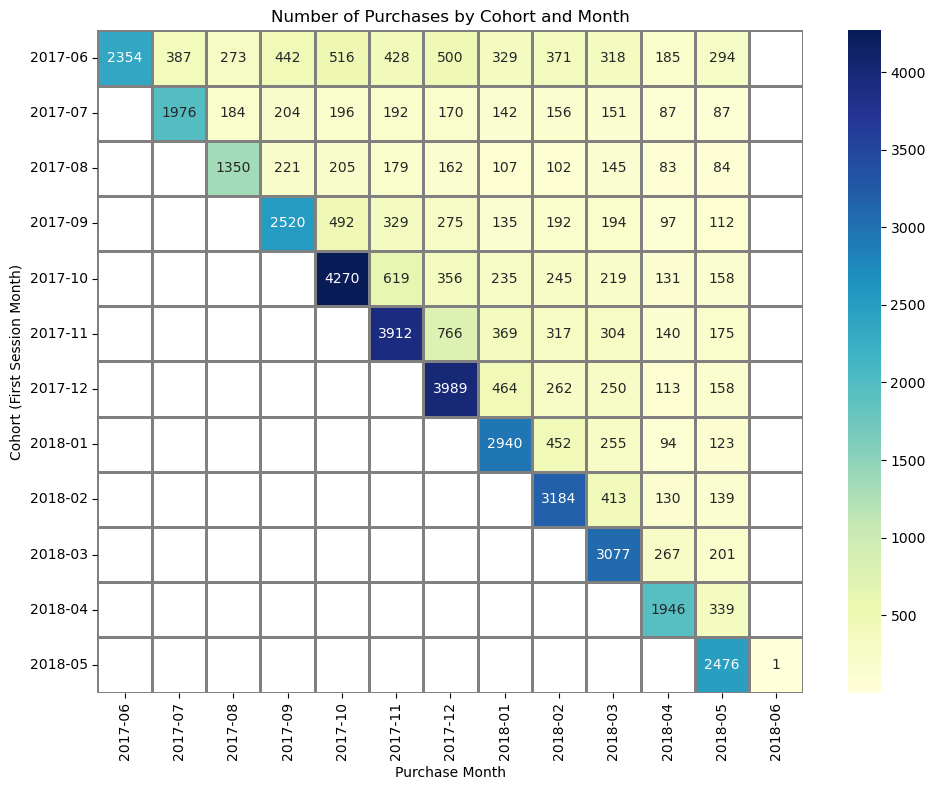

In [100]:
# Step 1: Ensure 'first_session_month' and 'buy_ts_month' exist as proper datetime-based month columns
orders['first_session_month'] = pd.to_datetime(orders['first_session_date']).dt.to_period('M')
orders['buy_ts_month'] = pd.to_datetime(orders['buy_ts']).dt.to_period('M')

# Step 2: Pivot table for cohort purchases (count of purchases by cohort and month)
cohort_monthly_purchases = orders.pivot_table(
    index='first_session_month',
    columns='buy_ts_month',
    values='uid',
    aggfunc='count'
)

# Step 3: Plot heatmap
plt.figure(figsize=(10, 8))
plt.title('Number of Purchases by Cohort and Month')
sns.heatmap(
    cohort_monthly_purchases,
    annot=True,
    fmt='.0f',            # integer format since these are counts
    linewidths=1,
    linecolor='gray',
    cmap='YlGnBu'         # Optional: better color gradient
)
plt.xlabel('Purchase Month')
plt.ylabel('Cohort (First Session Month)')
plt.tight_layout()
plt.show()


Average purchase size

In [105]:
orders_grouped_by_cohorts = orders.groupby(
    ['first_session_month', 'buy_ts_month']
).agg({
    'revenue': 'sum',      # total revenue from that cohort/month
    'uid': 'nunique'       # number of unique users from that cohort/month
}).reset_index()

orders_grouped_by_cohorts.head()



,first_session_month,buy_ts_month,revenue,uid
0,2017-06,2017-06,9557.362305,2023
1,2017-06,2017-07,2664.555664,231
2,2017-06,2017-08,1464.633179,129
3,2017-06,2017-09,3881.970215,188
4,2017-06,2017-10,3940.353516,257


In [106]:


orders_grouped_by_cohorts['revenue_per_user'] = (orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid']) 
orders_grouped_by_cohorts.head(3)



,first_session_month,buy_ts_month,revenue,uid,revenue_per_user
0,2017-06,2017-06,9557.362305,2023,4.724351
1,2017-06,2017-07,2664.555664,231,11.534873
2,2017-06,2017-08,1464.633179,129,11.353746


In [107]:
cohort_avg_revenue = orders_grouped_by_cohorts.pivot_table(
    index='first_session_month',
    columns='buy_ts_month',
    values='revenue_per_user',
    aggfunc='mean') 
cohort_avg_revenue

buy_ts_month,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06
first_session_month,,,,,,,,,,,,,
2017-06,4.724351,11.534873,11.353746,20.648778,15.332115,13.913039,18.466309,14.650903,13.475920,22.317557,19.332344,11.543540,NaN
2017-07,NaN,5.633091,7.846207,7.442330,6.382744,5.535826,6.000571,4.819522,6.018136,6.299847,8.208540,6.228441,NaN
2017-08,NaN,NaN,5.161092,6.392928,7.255736,8.087465,7.864242,7.011468,6.403776,14.489871,15.674093,6.477872,NaN
2017-09,NaN,NaN,NaN,5.475005,10.137729,8.757253,58.652733,11.607271,13.644155,6.905686,7.121561,4.500483,NaN
2017-10,NaN,NaN,NaN,NaN,4.882152,8.004135,4.544528,5.371028,5.270016,5.774936,4.990312,5.332567,NaN
2017-11,NaN,NaN,NaN,NaN,NaN,4.924476,4.797821,5.105918,7.483623,5.516023,6.491778,5.415350,NaN
2017-12,NaN,NaN,NaN,NaN,NaN,NaN,4.828579,5.269653,22.210142,27.398521,16.754294,14.368351,NaN
2018-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.007856,6.099029,6.655620,3.871903,5.860993,NaN
2018-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.036626,7.062078,6.699190,8.499375,NaN


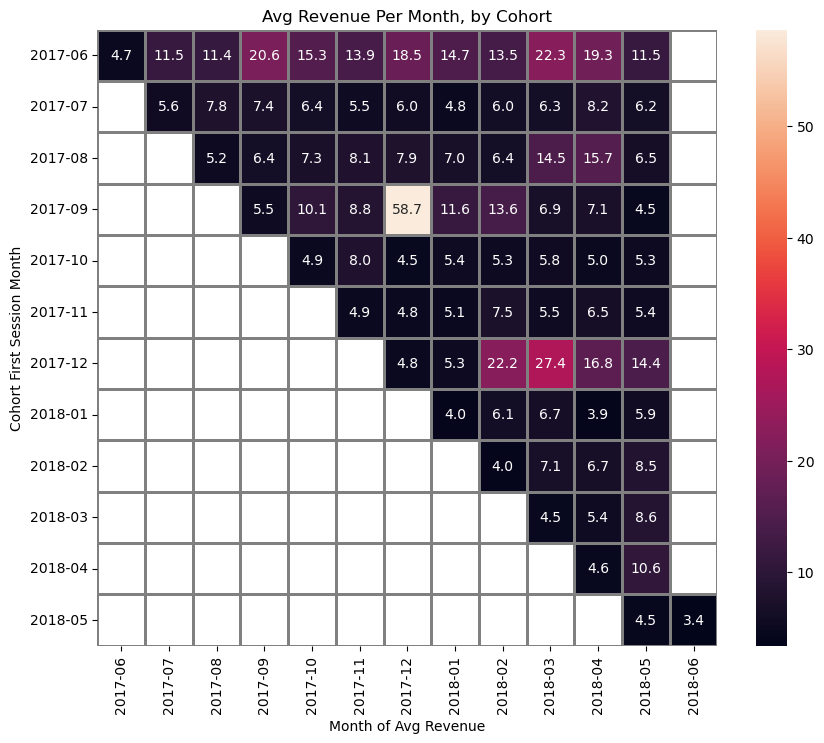

In [108]:
plt.figure(figsize=(10, 8))
plt.title('Avg Revenue Per Month, by Cohort')
sns.heatmap(
    cohort_avg_revenue,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
) 
plt.xlabel('Month of Avg Revenue')
plt.ylabel('Cohort First Session Month')
plt.show()

In [110]:
# Step 1: Ensure index is clean
orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index(drop=True)

# Step 2: Convert periods to integer ordinals to compute the difference
orders_grouped_by_cohorts['cohort_lifetime'] = (
    orders_grouped_by_cohorts['buy_ts_month'].astype('period[M]').apply(lambda x: x.ordinal) -
    orders_grouped_by_cohorts['first_session_month'].astype('period[M]').apply(lambda x: x.ordinal)
).astype('int8')

# Step 3: Preview
orders_grouped_by_cohorts.head()


,index,first_session_month,buy_ts_month,revenue,uid,revenue_per_user,cohort_lifetime
0,0,2017-06,2017-06,9557.362305,2023,4.724351,0
1,1,2017-06,2017-07,2664.555664,231,11.534873,1
2,2,2017-06,2017-08,1464.633179,129,11.353746,2
3,3,2017-06,2017-09,3881.970215,188,20.648778,3
4,4,2017-06,2017-10,3940.353516,257,15.332115,4


In [111]:
cohort_revenue = orders.groupby(['first_session_month','buy_ts_month']).agg({'revenue': 'sum'}).reset_index()

In [84]:
orders.head()

,buy_ts,revenue,uid,first_session_date,buy_ts_month
0,2017-06-01 00:10:00,17.000000,10329302124590727494,2017-06-01,2017-06
1,2017-06-01 00:25:00,0.549805,11627257723692907447,2017-06-01,2017-06
2,2017-06-01 00:27:00,0.370117,17903680561304213844,2017-06-01,2017-06
3,2017-06-01 00:29:00,0.549805,16109239769442553005,2017-06-01,2017-06
4,2017-06-01 07:58:00,0.370117,14200605875248379450,2017-06-01,2017-06


In [114]:
# Step 1: Get number of unique users per cohort (first session month)
cohort_users = orders.pivot_table(
    values='uid',
    index='first_session_month',
    aggfunc='nunique'
).reset_index()  # Optional: make first_session_month a column instead of index

# Step 2: Rename the column for clarity
cohort_users.columns = ['first_session_month', 'cohort_size']

# Step 3: Preview
cohort_users.head()


,first_session_month,cohort_size
0,2017-06,2923
1,2017-07,2458
2,2017-08,1721
3,2017-09,3058
4,2017-10,4678


In [115]:
report = pd.merge(cohort_users, cohort_revenue, on='first_session_month')
report.head(3) 

,first_session_month,cohort_size,buy_ts_month,revenue
0,2017-06,2923,2017-06,9557.362305
1,2017-06,2923,2017-07,2664.555664
2,2017-06,2923,2017-08,1464.633179


In [117]:
# Set margin rate
margin_rate = 0.5

# Calculate gross profit
report['gp'] = report['revenue'] * margin_rate

# Convert Period[M] columns to ordinal integers to compute age
report['age'] = (
    report['buy_ts_month'].apply(lambda x: x.ordinal) -
    report['first_session_month'].apply(lambda x: x.ordinal)
)

# Rename uid to n_users
report.rename(columns={"uid": "n_users"}, inplace=True)

# Preview
report.head()


,first_session_month,cohort_size,buy_ts_month,revenue,gp,age
0,2017-06,2923,2017-06,9557.362305,4778.681152,0
1,2017-06,2923,2017-07,2664.555664,1332.277832,1
2,2017-06,2923,2017-08,1464.633179,732.316589,2
3,2017-06,2923,2017-09,3881.970215,1940.985107,3
4,2017-06,2923,2017-10,3940.353516,1970.176758,4


In [121]:
# Example: Create 'n_users' if you have 'uid' column as user IDs

# If report is aggregated already:
# If 'uid' is count of unique users:
report.rename(columns={'uid': 'n_users'}, inplace=True)

# Or if you have the raw 'orders' DataFrame and need to group first:
report = orders.groupby(['first_session_month', 'buy_ts_month']).agg({
    'revenue': 'sum',
    'uid': 'nunique'
}).reset_index()

report.rename(columns={'uid': 'n_users'}, inplace=True)

# Now calculate gross profit (gp) and LTV
margin_rate = 0.5
report['gp'] = report['revenue'] * margin_rate
report['age'] = (
    report['buy_ts_month'].apply(lambda x: x.ordinal) -
    report['first_session_month'].apply(lambda x: x.ordinal)
).astype('int8')

report['ltv'] = report['gp'] / report['n_users']

# Pivot table
output = report.pivot_table(
    index='first_session_month',
    columns='age',
    values='ltv',
    aggfunc='sum'
).fillna(0)

output.head()


age,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06,2.362176,5.767437,5.676873,10.324389,7.666057,6.956520,9.233154,7.325451,6.737960,11.158778,9.666172,5.77177
2017-07,2.816546,3.923103,3.721165,3.191372,2.767913,3.000286,2.409761,3.009068,3.149924,4.104270,3.114220,0.00000
2017-08,2.580546,3.196464,3.627868,4.043733,3.932121,3.505734,3.201888,7.244936,7.837046,3.238936,0.000000,0.00000
2017-09,2.737503,5.068864,4.378627,29.326367,5.803636,6.822078,3.452843,3.560780,2.250242,0.000000,0.000000,0.00000
2017-10,2.441076,4.002068,2.272264,2.685514,2.635008,2.887468,2.495156,2.666284,0.000000,0.000000,0.000000,0.00000


In [122]:
output.cumsum(axis=1)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06,2.362176,8.129612,13.806485,24.130874,31.796931,38.753451,47.986605,55.312056,62.050016,73.208794,82.874966,88.646736
2017-07,2.816546,6.739649,10.460814,13.652186,16.420099,19.420385,21.830146,24.839214,27.989137,32.093407,35.207628,35.207628
2017-08,2.580546,5.777010,9.404878,13.448611,17.380732,20.886466,24.088354,31.333289,39.170336,42.409272,42.409272,42.409272
2017-09,2.737503,7.806367,12.184994,41.511360,47.314996,54.137074,57.589917,61.150697,63.400939,63.400939,63.400939,63.400939
2017-10,2.441076,6.443144,8.715408,11.400922,14.035930,16.923398,19.418554,22.084837,22.084837,22.084837,22.084837,22.084837
2017-11,2.462238,4.861149,7.414108,11.155919,13.913931,17.159820,19.867495,19.867495,19.867495,19.867495,19.867495,19.867495
2017-12,2.414289,5.049116,16.154187,29.853447,38.230594,45.414769,45.414769,45.414769,45.414769,45.414769,45.414769,45.414769
2018-01,2.003928,5.053442,8.381252,10.317204,13.247701,13.247701,13.247701,13.247701,13.247701,13.247701,13.247701,13.247701
2018-02,2.018313,5.549352,8.898947,13.148634,13.148634,13.148634,13.148634,13.148634,13.148634,13.148634,13.148634,13.148634


In [123]:
cohort_sum_ltv = output.sum(axis=1).to_frame()
cohort_sum_ltv.reset_index(inplace=True)
cohort_sum_ltv.columns = ['cohort_start', 'total_ltv']
cohort_sum_ltv['total_ltv'] = cohort_sum_ltv['total_ltv'].round(2)
cohort_sum_ltv

,cohort_start,total_ltv
0,2017-06,88.65
1,2017-07,35.21
2,2017-08,42.41
3,2017-09,63.40
4,2017-10,22.08
5,2017-11,19.87
6,2017-12,45.41
7,2018-01,13.25
8,2018-02,13.15
9,2018-03,9.25


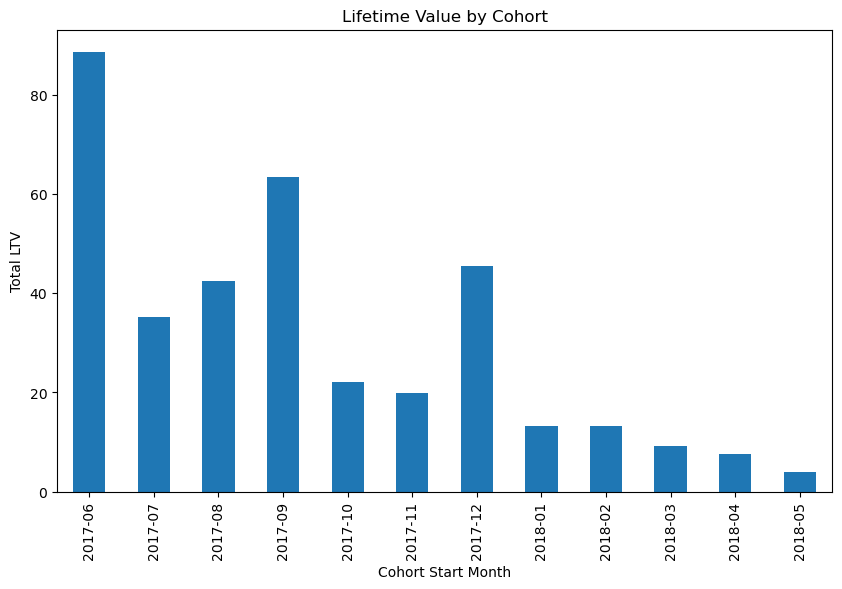

In [124]:
cohort_sum_ltv.plot.bar(x='cohort_start', y='total_ltv', figsize=(10,6), legend=False)
plt.title('Lifetime Value by Cohort')
plt.xlabel('Cohort Start Month')
plt.ylabel('Total LTV')
plt.show()

In [127]:
# Get source for every user
# Step 1: For each user, get their first visit source_id based on earliest start_ts
visits_source = customer_visits.sort_values('start_ts').groupby('uid')['source_id'].first().reset_index()

# Step 2: Merge this info into orders
orders = orders.merge(visits_source, on='uid', how='left')

# Step 3: Preview the updated orders DataFrame
orders.head()


,buy_ts,revenue,uid,first_order_date,first_session_date,days_to_conversion,conversion_bracket,first_session_month,buy_ts_month,source_id
0,2017-06-01 00:10:00,17.000000,10329302124590727494,2017-06-01 00:10:00,2017-06-01,0,0d,2017-06,2017-06,1
1,2017-06-01 00:25:00,0.549805,11627257723692907447,2017-06-01 00:25:00,2017-06-01,0,0d,2017-06,2017-06,2
2,2017-06-01 00:27:00,0.370117,17903680561304213844,2017-06-01 00:27:00,2017-06-01,0,0d,2017-06,2017-06,2
3,2017-06-01 00:29:00,0.549805,16109239769442553005,2017-06-01 00:29:00,2017-06-01,0,0d,2017-06,2017-06,2
4,2017-06-01 07:58:00,0.370117,14200605875248379450,2017-06-01 07:58:00,2017-06-01,0,0d,2017-06,2017-06,3


In [128]:
source_revenue = orders.pivot_table(values='revenue', index='source_id', aggfunc='mean')
source_revenue.sort_values(by='revenue', ascending=False)

,revenue
source_id,
2,7.340631
1,5.952481
5,5.594786
4,4.396744
3,4.101898
9,3.496883
10,2.849042
7,1.219727


EDA- Marketing

In [129]:
costs.head(3)

,source_id,dt,costs
0,1,2017-06-01,75.18750
1,1,2017-06-02,62.25000
2,1,2017-06-03,36.53125


In [130]:
costs['purchase_month'] = pd.to_datetime(costs['dt']).dt.to_period('M')
cost_totals = costs.pivot_table(index='purchase_month', columns='source_id', values='costs', aggfunc='sum')
cost_totals

source_id,1,2,3,4,5,9,10
purchase_month,,,,,,,
2017-06,1125.578125,2427.062500,7731.78125,3515.021484,2616.125000,285.210938,314.210938
2017-07,1072.902344,2333.015625,7674.62500,3529.960938,2998.375000,302.562500,329.813477
2017-08,951.773438,1811.078125,6143.87500,3217.458984,2185.250000,248.925781,232.566406
2017-09,1502.015625,2985.687500,9963.00000,5192.664062,3849.187500,415.625000,460.644531
2017-10,2315.656250,4844.812500,15736.37500,6421.170898,5767.250000,609.410156,627.245117
2017-11,2445.156250,5247.500000,17025.25000,5389.078125,6325.312500,683.203125,792.363281
2017-12,2341.343750,4897.625000,16219.37500,7681.046875,5872.312500,657.984375,645.917969
2018-01,2186.093750,4157.750000,14808.87500,5832.781250,5371.375000,547.179688,614.381836
2018-02,2204.562500,4474.125000,14228.62500,5712.027344,5071.062500,551.507812,480.910156


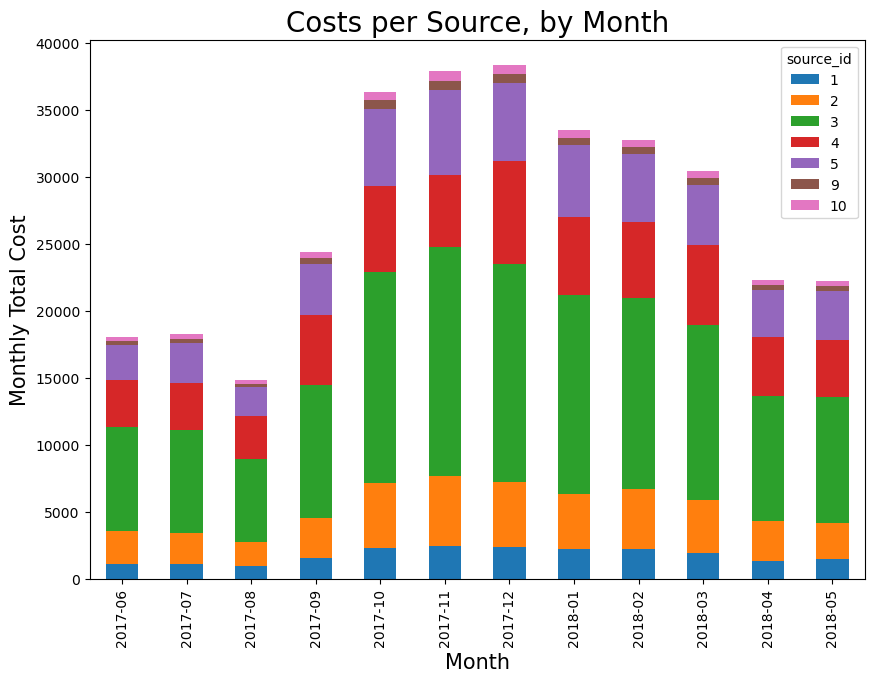

In [131]:
cost_totals.plot.bar(stacked=True, figsize=(10,7))

plt.title('Costs per Source, by Month', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Monthly Total Cost', fontsize=15)
plt.show()

In [133]:
# Get source for every user
visits_source = customer_visits.sort_values('start_ts').groupby('uid')['source_id'].first().reset_index()

In [134]:
orders.head()

,buy_ts,revenue,uid,first_order_date,first_session_date,days_to_conversion,conversion_bracket,first_session_month,buy_ts_month,source_id
0,2017-06-01 00:10:00,17.000000,10329302124590727494,2017-06-01 00:10:00,2017-06-01,0,0d,2017-06,2017-06,1
1,2017-06-01 00:25:00,0.549805,11627257723692907447,2017-06-01 00:25:00,2017-06-01,0,0d,2017-06,2017-06,2
2,2017-06-01 00:27:00,0.370117,17903680561304213844,2017-06-01 00:27:00,2017-06-01,0,0d,2017-06,2017-06,2
3,2017-06-01 00:29:00,0.549805,16109239769442553005,2017-06-01 00:29:00,2017-06-01,0,0d,2017-06,2017-06,2
4,2017-06-01 07:58:00,0.370117,14200605875248379450,2017-06-01 07:58:00,2017-06-01,0,0d,2017-06,2017-06,3


In [135]:
orders_source = orders

In [137]:
# Convert 'first_order_date' to datetime (date only)
orders_source['first_order_date'] = pd.to_datetime(orders_source['first_order_date']).dt.normalize()

# Group by 'source_id' and 'first_order_date' to count unique buyers
buyers_source = (
    orders_source
    .groupby(['source_id', 'first_order_date'])
    .agg({'uid': 'nunique'})
    .rename(columns={'uid': 'n_buyers'})
    .reset_index()
)

buyers_source.head()


,source_id,first_order_date,n_buyers
0,1,2017-06-01,14
1,1,2017-06-02,7
2,1,2017-06-03,7
3,1,2017-06-04,3
4,1,2017-06-05,18


In [138]:
# Create CAC table
cac_source_table = buyers_source.merge(costs, 
                                       left_on = ['source_id', 'first_order_date'],
                                       right_on = ['source_id', 'dt'])
cac_source_table['cac_source'] = cac_source_table['costs'] / cac_source_table['n_buyers']
cac_pivot_source = cac_source_table.pivot_table(index='purchase_month', 
                                                columns='source_id', 
                                                values='cac_source', 
                                                aggfunc='mean')

In [139]:
cac_pivot_source

source_id,1,2,3,4,5,9,10
purchase_month,,,,,,,
2017-06,11.681185,12.882047,16.716655,10.792614,9.209239,5.253484,4.589899
2017-07,9.491582,18.000461,18.594277,8.054733,7.938545,5.582959,6.151737
2017-08,12.118720,18.887374,19.795804,11.555203,6.879497,4.900091,5.812853
2017-09,8.155941,17.672744,13.083079,9.534429,6.864943,6.049194,8.305850
2017-10,8.201893,14.192468,14.612308,6.233686,6.305854,5.923341,6.362884
2017-11,8.908586,17.437833,16.091615,5.013540,9.368234,9.400785,10.801052
2017-12,8.570982,13.870633,12.948169,5.656924,8.398704,7.899846,7.803729
2018-01,11.719017,15.850227,15.135025,5.901024,9.371519,9.792874,9.851778
2018-02,10.752314,18.209531,13.894589,5.428159,7.724972,8.181598,4.489873


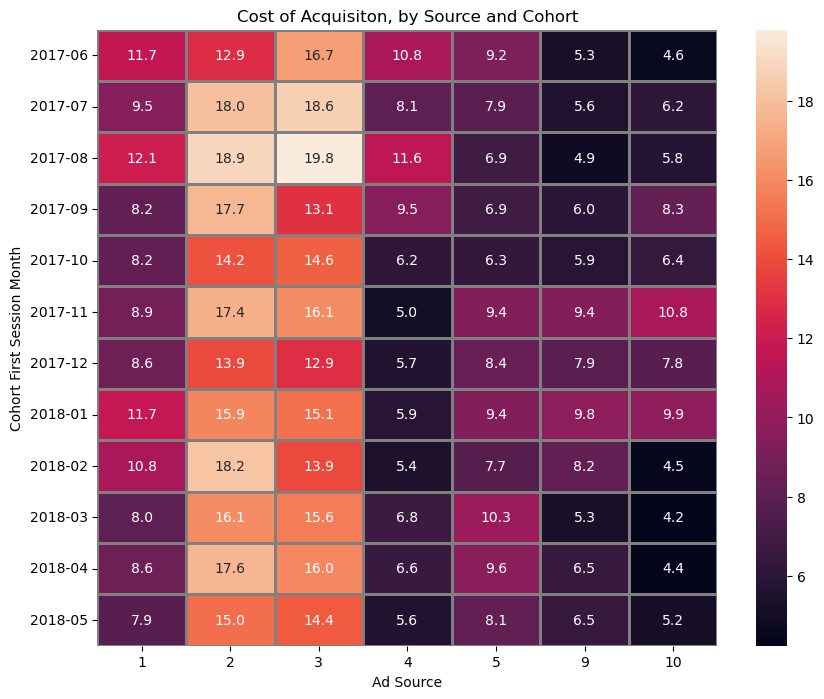

In [140]:
plt.figure(figsize=(10, 8))
plt.title('Cost of Acquisiton, by Source and Cohort')
sns.heatmap(
    cac_pivot_source,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
) 
plt.xlabel('Ad Source')
plt.ylabel('Cohort First Session Month')
plt.show()

ROI

In [141]:
report.head()

,first_session_month,buy_ts_month,revenue,n_users,gp,age,ltv
0,2017-06,2017-06,9557.362305,2023,4778.681152,0,2.362176
1,2017-06,2017-07,2664.555664,231,1332.277832,1,5.767437
2,2017-06,2017-08,1464.633179,129,732.316589,2,5.676873
3,2017-06,2017-09,3881.970215,188,1940.985107,3,10.324389
4,2017-06,2017-10,3940.353516,257,1970.176758,4,7.666057


In [142]:
cac_pivot_source

source_id,1,2,3,4,5,9,10
purchase_month,,,,,,,
2017-06,11.681185,12.882047,16.716655,10.792614,9.209239,5.253484,4.589899
2017-07,9.491582,18.000461,18.594277,8.054733,7.938545,5.582959,6.151737
2017-08,12.118720,18.887374,19.795804,11.555203,6.879497,4.900091,5.812853
2017-09,8.155941,17.672744,13.083079,9.534429,6.864943,6.049194,8.305850
2017-10,8.201893,14.192468,14.612308,6.233686,6.305854,5.923341,6.362884
2017-11,8.908586,17.437833,16.091615,5.013540,9.368234,9.400785,10.801052
2017-12,8.570982,13.870633,12.948169,5.656924,8.398704,7.899846,7.803729
2018-01,11.719017,15.850227,15.135025,5.901024,9.371519,9.792874,9.851778
2018-02,10.752314,18.209531,13.894589,5.428159,7.724972,8.181598,4.489873


In [143]:
# calculating the costs per month
cac_month = cac_pivot_source.mean(axis=1).reset_index().rename(columns={0: 'cac'})
report = report.merge(cac_month, left_on='first_session_month', right_on='purchase_month')
report.head()

,first_session_month,buy_ts_month,revenue,n_users,gp,age,ltv,purchase_month,cac
0,2017-06,2017-06,9557.362305,2023,4778.681152,0,2.362176,2017-06,10.160732
1,2017-06,2017-07,2664.555664,231,1332.277832,1,5.767437,2017-06,10.160732
2,2017-06,2017-08,1464.633179,129,732.316589,2,5.676873,2017-06,10.160732
3,2017-06,2017-09,3881.970215,188,1940.985107,3,10.324389,2017-06,10.160732
4,2017-06,2017-10,3940.353516,257,1970.176758,4,7.666057,2017-06,10.160732


In [144]:
#Calculate ROMI by dividing LTV by CAC.
report['romi'] = report['ltv'] / report['cac']
report

,first_session_month,buy_ts_month,revenue,n_users,gp,age,ltv,purchase_month,cac,romi
0,2017-06,2017-06,9557.362305,2023,4778.681152,0,2.362176,2017-06,10.160732,0.232481
1,2017-06,2017-07,2664.555664,231,1332.277832,1,5.767437,2017-06,10.160732,0.567620
2,2017-06,2017-08,1464.633179,129,732.316589,2,5.676873,2017-06,10.160732,0.558707
3,2017-06,2017-09,3881.970215,188,1940.985107,3,10.324389,2017-06,10.160732,1.016107
4,2017-06,2017-10,3940.353516,257,1970.176758,4,7.666057,2017-06,10.160732,0.754479
...,...,...,...,...,...,...,...,...,...,...
74,2018-03,2018-05,774.753052,90,387.376526,2,4.304184,2018-03,9.473669,0.454331
75,2018-04,2018-04,8043.583984,1763,4021.791992,0,2.281221,2018-04,9.896849,0.230500
76,2018-04,2018-05,1838.703735,174,919.351868,1,5.283631,2018-04,9.896849,0.533870
77,2018-05,2018-05,10367.700195,2315,5183.850098,0,2.239244,2018-05,8.956944,0.250001


In [145]:
report.pivot_table(columns='first_session_month', index='age', values='romi', aggfunc='mean').cumsum(axis=1).round(2)

first_session_month,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
age,,,,,,,,,,,,
0,0.23,0.50,0.73,1.00,1.28,1.50,1.76,1.94,2.15,2.38,2.62,2.87
1,0.57,0.94,1.22,1.73,2.18,2.40,2.68,2.96,3.32,3.60,4.14,4.33
2,0.56,0.91,1.23,1.67,1.93,2.16,3.35,3.65,3.99,4.45,NaN,NaN
3,1.02,1.32,1.67,4.62,4.92,5.26,6.74,6.91,7.34,NaN,NaN,NaN
4,0.75,1.02,1.36,1.94,2.24,2.49,3.39,3.66,NaN,NaN,NaN,NaN
5,0.68,0.97,1.28,1.96,2.29,2.58,3.36,NaN,NaN,NaN,NaN,NaN
6,0.91,1.14,1.42,1.76,2.05,2.29,NaN,NaN,NaN,NaN,NaN,NaN
7,0.72,1.01,1.64,2.00,2.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.66,0.96,1.65,1.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
romi_output = report.pivot_table(index='first_session_month', columns='age', values='romi', aggfunc='mean').cumsum(axis=1).round(2)
romi_output

age,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06,0.23,0.80,1.36,2.37,3.13,3.81,4.72,5.44,6.11,7.21,8.16,8.72
2017-07,0.27,0.64,0.99,1.29,1.56,1.84,2.07,2.36,2.65,3.04,3.34,NaN
2017-08,0.23,0.51,0.82,1.18,1.52,1.83,2.11,2.74,3.43,3.71,NaN,NaN
2017-09,0.28,0.78,1.22,4.17,4.75,5.44,5.79,6.14,6.37,NaN,NaN,NaN
2017-10,0.28,0.73,0.99,1.29,1.59,1.92,2.20,2.50,NaN,NaN,NaN,NaN
2017-11,0.22,0.44,0.67,1.01,1.26,1.56,1.81,NaN,NaN,NaN,NaN,NaN
2017-12,0.26,0.54,1.74,3.21,4.11,4.88,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,0.18,0.46,0.76,0.93,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,0.21,0.57,0.91,1.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
#Increasing size of floats so new calculations don't return infinity
orders['revenue'] = orders['revenue'].astype('float32')
costs['costs'] = costs['costs'].astype('float32')

#Totaling revenue by source
source_revenue_total = orders.pivot_table(values='revenue', index='source_id', aggfunc='sum').round()
source_revenue_total.reset_index(inplace=True)

#Totaling costs by source
source_costs_total = costs.pivot_table(index='source_id', values='costs', aggfunc='sum').round()
source_costs_total.reset_index(inplace=True)

In [148]:
#Merging
source_compare = source_revenue_total.merge(source_costs_total, on='source_id')
source_compare.columns = ['source_id', 'total_revenue', 'total_marketing_costs']

#ROI of ad campaign = (income − expenses) / expenses
source_compare['ROI'] = (source_compare['total_revenue'] - source_compare['total_marketing_costs']) / source_compare['total_marketing_costs']
source_compare.sort_values(by='ROI', ascending=False)

,source_id,total_revenue,total_marketing_costs,ROI
0,1,31090.0,20834.0,0.492272
1,2,46921.0,42805.0,0.096157
5,9,5759.0,5518.0,0.043675
4,5,52625.0,51757.0,0.016771
3,4,56696.0,61075.0,-0.071699
6,10,4450.0,5823.0,-0.235789
2,3,54510.0,141320.0,-0.614280




Conclusions: Upon close investigation of return on investment, the current business model as it stands is not sustainable as no group returned a profit after paying off their cost of acquisiton.

If the project has it's sights on potential future returns I would advise the marketing team to increase their investments in sources 1, 2, and 9. And furthermore to perhaps decrease spending in sources 3, 10, 4, and 5. In fact total marketing costs for source one are SO much lower than source 3, and in fact source 3 has the lowest ROI so I would recommend phasing out source 3 in favor of source 1. Indeed I would probably recommend they transfer the spending on the lower 4 in the chart above to the top 4, perhaps in phases to chart the effect - perhaps by narrowing the focus to just our top 4 sources by ROI we could increase our revenue while decreasing our costs.
